## importing libararies 

#### cohort analysis is tha process of deviding customer into diffrent group based on simalr characteristics  like 
                        SIZE
                        TIME 
                        PURCHASING BEHAVIOUR

In [1]:
# importing libariares ..
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

## reading data 

In [2]:
#read into dataframe 
df=pd.read_excel('Online Retail.xlsx')

In [3]:
# first 5 columns 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
# CREATE PRICE COLUMNS 
df['price']=df['Quantity']*df['UnitPrice']

In [4]:
# info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# check for the data type 
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# check for null values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# REMOVE NULL VALUES 
df.dropna(subset=['CustomerID'],inplace=True)

In [8]:
# check.. 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)
    

In [10]:
df['payment_month']=df['InvoiceDate'].apply(get_month)


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,payment_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [12]:
# get the cohort month --- the month that the customer first entered the data 
df['cohort_month']=df.groupby('CustomerID')['payment_month'].transform('min')

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,payment_month,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [14]:
#function to get the diffrence in the two columns :: 
def get_diff(df,col):
    day=df[col].dt.day
    month=df[col].dt.month
    year=df[col].dt.year
    return day,month,year

In [15]:
# cohort month -- 
_,cohort_month,cohort_year=get_diff(df,'cohort_month')
# purchase month -- 
_,payment_month,payment_year=get_diff(df,'payment_month')
month_diff=payment_month-cohort_month
year_diff=payment_year-cohort_year
# get the diffrence -- 
df['cohort_index']= year_diff *12 +month_diff +1

In [16]:
df.cohort_index.value_counts()

1     119191
2      29147
4      28075
6      27576
3      27493
5      25926
12     24520
7      24214
8      24200
10     24075
9      23672
11     21331
13      7409
Name: cohort_index, dtype: int64

In [17]:
# create the pivot table -- 
df.groupby('payment_month')['CustomerID'].nunique()

payment_month
2010-12-01     948
2011-01-01     783
2011-02-01     798
2011-03-01    1020
2011-04-01     899
2011-05-01    1079
2011-06-01    1051
2011-07-01     993
2011-08-01     980
2011-09-01    1302
2011-10-01    1425
2011-11-01    1711
2011-12-01     686
Name: CustomerID, dtype: int64

In [18]:
pivot_data=df.groupby(['cohort_month','cohort_index'])['CustomerID'].nunique().reset_index()

In [19]:
pivot=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='CustomerID')

In [20]:
pivot=pivot.divide(pivot.iloc[:,0],axis=0)

In [21]:
pivot.index=pivot.index.strftime('%B' '%Y')
pivot=pivot.divide(pivot.iloc[:,0],axis=0)

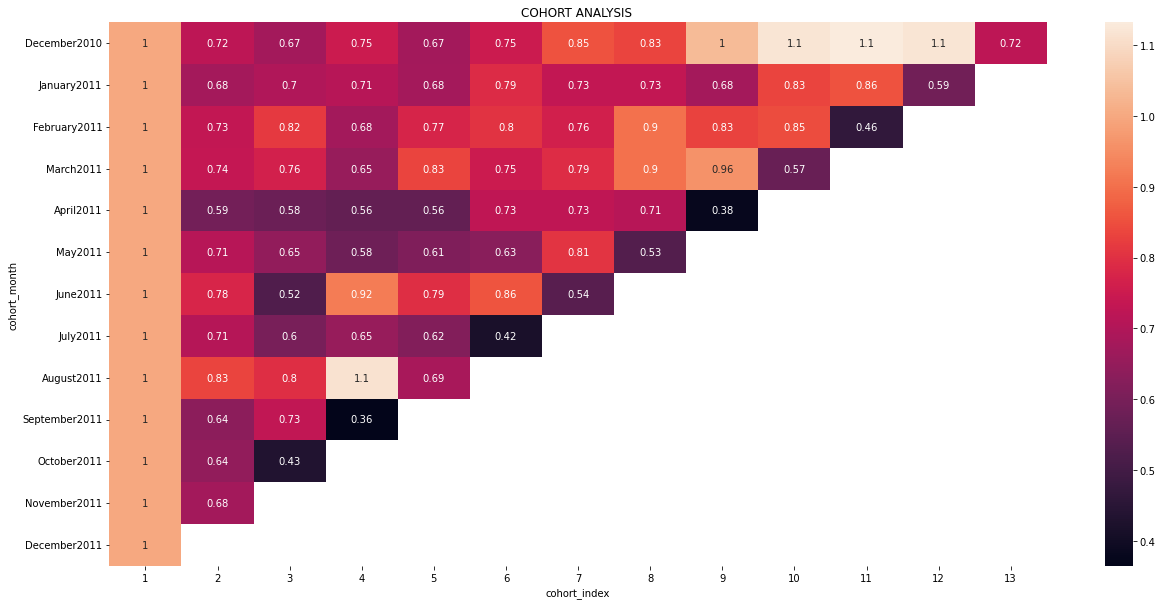

In [28]:
plt.figure(figsize=(21,10))
plt.title('COHORT ANALYSIS ')
sns.heatmap(pivot,annot=True)
plt.show();

## INTRPRET RESULTS 

### time cohort is used to calacute the retuention rate : which is how percentage of customer buy again .. 
    so fro, up to down :: comparing along diffrent cohorts to know the performance .. 
            so the cohort started on dec 2010 in the second month have 38 % retention rate 
        
        from left to right-- study the performace of the same cohort 
        diagonal -- the same month of comparison 

In [40]:
#

pivot_data=df.groupby(['cohort_month','cohort_index'])['Quantity'].mean().reset_index()

In [61]:
pivot=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='Quantity')
pivot.index=pivot.index.strftime('%B' '%Y')
pivot.round(1)


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
December2010,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
January2011,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
February2011,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
March2011,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
April2011,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
May2011,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
June2011,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
July2011,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August2011,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
## AVG PRICE
price_cohort=df.groupby(['cohort_month','cohort_index'])['price'].mean().reset_index()


In [75]:
pivot=price_cohort.pivot(index='cohort_month',columns='cohort_index',values='price')


In [77]:
pivot.index=pivot.index.strftime('%B' '%Y')

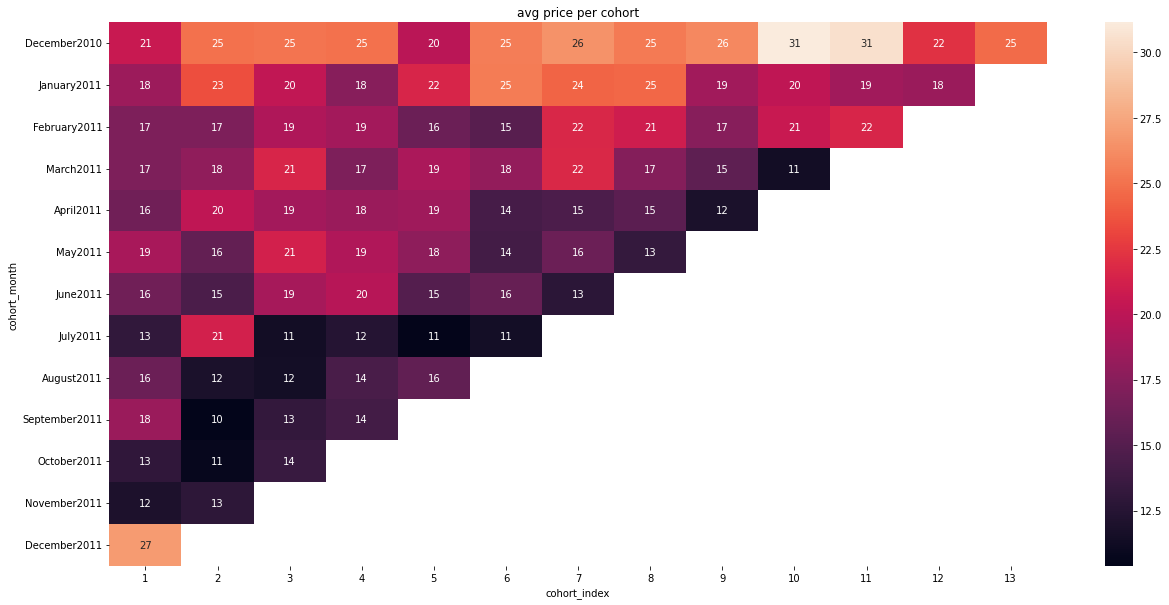

In [80]:
plt.figure(figsize=(21,10))
plt.title('avg price per cohort')
sns.heatmap(pivot,annot=True);

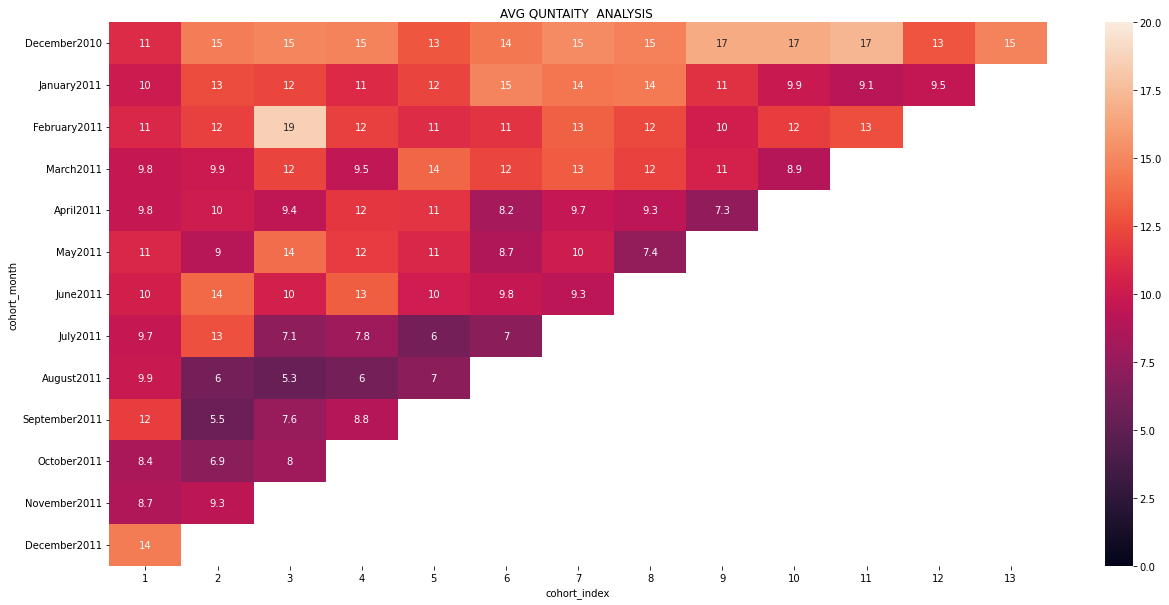

In [48]:
plt.figure(figsize=(21,10))
plt.title('AVG QUNTAITY  ANALYSIS ')
sns.heatmap(pivot,annot=True,vmin = 0.0,vmax =20)
plt.show();